# Dog Toys Answer Key
## Dr Austin R Brown
### School of Data Science & Analytics
### Kennesaw State University

In [ ]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Comparative Experiments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

## Question 1. Specify the outcome and independent variables. What lurking variables might be present?

- Outcome = PSI when ball rips (continuous numeric variable); IV = Formulation (nominal categorical variable). There could be a lurking variable if different operators are used to test the balls, supposing they have different levels of experience operating the machine. Ideally, only one operator would use the machine to manufacutre the balls to remove this source of variation.

## Question 2. Briefly explain why a completely randomized design might be appropriate in this context

- A CRD would be appropriate here because we have two treatments that we'd like to compare. Additionally, we are randomly manufacturing the toys without many other sources of variation that we would need to control for in a more complex design.

## Question 3. Perform an appropriate exploratory analysis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Formulation  120 non-null    object 
 1   PSI          120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB
                   mean        std
Formulation                       
Formula 1    278.432167  12.450986
Formula 2    291.924333  16.644723


Text(0, 0.5, 'Pounds Per Square Inch (PSI)')

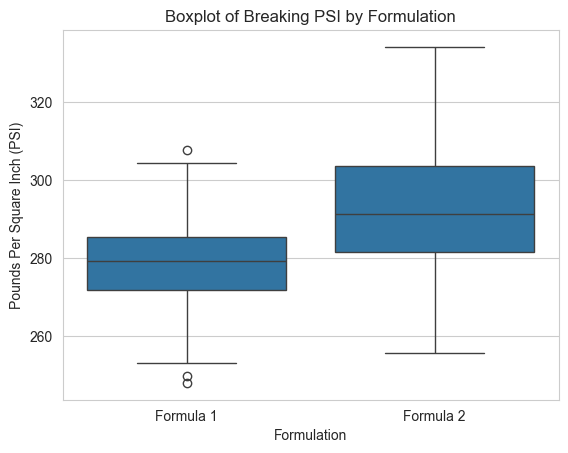

In [28]:
## Import Necessary Packages to Perform Exploratory Analysis ##

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Import Dog Toys.xlsx file ##

dog_toys = pd.read_excel("Dog Toys.xlsx")

## Check Data Integrity ##

dog_toys.info()

## Calculate Group Means and Standard Deviations ##

summary_stats = dog_toys.groupby('Formulation')['PSI'].agg(['mean','std'])

print(summary_stats)

## Generate Boxplots for Visual Comparison ##

## Set a nice minimal style for plot ##

sns.set_style("whitegrid")

## Create boxplot using seaborn ##

sns.boxplot(x="Formulation",y="PSI",data=dog_toys)

## Add Title and Labels using matplotlib ##

plt.title("Boxplot of Breaking PSI by Formulation", loc='center')
plt.xlabel("Formulation")
plt.ylabel("Pounds Per Square Inch (PSI)")

- To interpret these results, we can see that Formulation 2 has about 20 more PSI, on average, compared to Formulation 1. Practically, this means that F2 toys can withstand 20 more PSI than can F1 toys. We can see this in the visualization considering that F2 and F1's boxes don't have substantial overlap. In context, this likely implies that the PSI F2 toys can withstand is statistically greater than the PSI F1 toys can withstand.

## Question 4. Perform an appropriate inferential analysis (including the specification of $H_0$ and $H_1$)

- First, let's specify $H_0$ and $H_1$:

$$ H_0: \text{Mean PSI between Formulation 1 and Formulation 2 is the same} $$
$$ H_1: \text{Mean PSI between Formulation 1 and Formulation 2 is different} $$

- Now, let's fit our one-way ANOVA model and print the ANOVA table out paying specific attention to the F-statistic and its associated p-value. 


In [29]:
## Import Necessary Libraries ##
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Fit Model ##

dog_mod = ols("PSI~Formulation",data=dog_toys).fit()

## Obtain ANOVA table ##

dog_tab = sm.stats.anova_lm(dog_mod,typ=1) ## We use Type 1 sums of squares when we only have 1 IV 
## or when we are iteratively adding variables to a model ##

print(dog_tab)

                df        sum_sq      mean_sq          F    PR(>F)
Formulation    1.0   5461.156841  5461.156841  25.278813  0.000002
Residual     118.0  25492.356292   216.036918        NaN       NaN


## Question 5. Provide Contextual Conclusions -- Which Formulation Seems More Durable?

- So we can see here that $F(1,118) = 25.28$ with an associated p-value of $p < 0.001$. This implies that the data more strongly support the alternative hypothesis. Contextually, this means that the mean difference we observed in the descriptive analysis is statistically meaningful. In other words, F2 toys are likely tougher toys and can withstand stronger bites from pets.

## Question 6. What Questions Remain?

- In this experiment, the dog toys were crushed to simulate a dog's bite force. However, dogs mostly have pointed canine teeth for piercing. This experiment didn't consider the effect of biting force in conjunction with teeth piercing. In other words, we know the F2 toys can withstand a strong bite but we don't know if they will easily rip when bit with a sharp tooth. This should be accounted for in a subsequent experiment.